In [39]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
df = pd.read_csv("C:/Users/Dell/Desktop/datasets/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [41]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [42]:
df.values

array([[1, 15634602, 'Hargrave', ..., 1, 101348.88, 1],
       [2, 15647311, 'Hill', ..., 1, 112542.58, 0],
       [3, 15619304, 'Onio', ..., 0, 113931.57, 1],
       ...,
       [9998, 15584532, 'Liu', ..., 1, 42085.58, 1],
       [9999, 15682355, 'Sabbatini', ..., 0, 92888.52, 1],
       [10000, 15628319, 'Walker', ..., 0, 38190.78, 0]], dtype=object)

In [43]:
df.size

140000

In [44]:
df.shape

(10000, 14)

In [45]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [46]:
df.isna()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [47]:
#we have to split the independent and dependent columns
X = df.iloc[:, 3:13]
Y = df.iloc[:, 13]

In [48]:
X.shape

(10000, 10)

In [49]:
Y.shape

(10000,)

In [50]:
df['Geography']

0        France
1         Spain
2        France
3        France
4         Spain
         ...   
9995     France
9996     France
9997     France
9998    Germany
9999     France
Name: Geography, Length: 10000, dtype: object

In [51]:
df['Gender']

0       Female
1       Female
2       Female
3       Female
4       Female
         ...  
9995      Male
9996      Male
9997    Female
9998      Male
9999    Female
Name: Gender, Length: 10000, dtype: object

In [52]:
#create dummy variables for two columns (geography & gender)
geography = pd.get_dummies(X["Geography"],drop_first=True)
gender = pd.get_dummies(X['Gender'],drop_first=True)

In [53]:
geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [54]:
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [55]:
#concatenate the dataframes
X = pd.concat([X,geography,gender],axis=1)

In [56]:
#drop the unnecessary columns
X = X.drop(['Geography','Gender'],axis=1)

In [57]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [58]:
#splitting the dataset into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=0)

In [59]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(7500, 11)
(2500, 11)
(7500,)
(2500,)


In [60]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

#  Now let's make the ANN!

In [61]:
import keras
#It is responsible for creatingany neural network(CNN, RNN, ANN)
from keras.models import Sequential 
#using for hidden layers
from keras.layers import Dense 
#from keras.layers import LeakyReLU,PReLU,ELU
#using for dropout the unwanted layers basically it is a regularization parameter
from keras.layers import Dropout
import warnings
warnings.filterwarnings('ignore')

In [62]:
#Initialising the ANN
classifier = Sequential()

In [63]:
#Adding theinput layer and the first hidden layer
'''classifier.add(Dense(output_dim = 6, init = 'he_uniform', activation='relu', input_dim = 11))'''
#increase the hidden layers and weight initilization technique
classifier.add(Dense(units = 10, kernel_initializer = 'he_normal', activation='relu', input_dim = 11))
#Adding dropout layer
classifier.add(Dropout(0.3))

In [64]:
#Adding the second hidden layer
'''classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform', activation = 'relu'))'''
classifier.add(Dense(units = 20, kernel_initializer = 'he_normal', activation = 'relu'))
#Adding dropout layer
classifier.add(Dropout(0.4))

In [65]:
#Adding the third hidden layer
classifier.add(Dense(units = 15, kernel_initializer = 'he_normal', activation = 'relu'))
#Adding dropout layer
classifier.add(Dropout(0.2))

In [66]:
#Adding the third hidden layer
classifier.add(Dense(units = 15, kernel_initializer = 'he_normal', activation = 'relu'))

In [67]:
#Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

In [68]:
#Compiling the ANN
classifier.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [69]:
#here we have to show the hidden layers 
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 10)                120       
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 20)                220       
_________________________________________________________________
dropout_2 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 15)                315       
_________________________________________________________________
dropout_3 (Dropout)          (None, 15)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 15)               

In [70]:
#Fitting the ANN to the Training set
model_history = classifier.fit(X_train, Y_train, validation_split = 0.25, batch_size = 10, nb_epoch=10)

Train on 5625 samples, validate on 1875 samples
Epoch 1/10
5625/5625 [==============================] - 17s 3ms/step - loss: 0.5916 - accuracy: 0.7484 - val_loss: 0.4811 - val_accuracy: 0.8000
Epoch 2/10
5625/5625 [==============================] - 2s 271us/step - loss: 0.5000 - accuracy: 0.7968 - val_loss: 0.4583 - val_accuracy: 0.8000
Epoch 3/10
5625/5625 [==============================] - 1s 258us/step - loss: 0.4856 - accuracy: 0.7952 - val_loss: 0.4468 - val_accuracy: 0.8005
Epoch 4/10
5625/5625 [==============================] - 2s 285us/step - loss: 0.4753 - accuracy: 0.7956 - val_loss: 0.4372 - val_accuracy: 0.8032
Epoch 5/10
5625/5625 [==============================] - 1s 258us/step - loss: 0.4566 - accuracy: 0.8028 - val_loss: 0.4284 - val_accuracy: 0.8059
Epoch 6/10
5625/5625 [==============================] - 1s 265us/step - loss: 0.4524 - accuracy: 0.8043 - val_loss: 0.4239 - val_accuracy: 0.8069
Epoch 7/10
5625/5625 [==============================] - 2s 308us/step - loss:

In [71]:
#list all data in history
print(model_history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


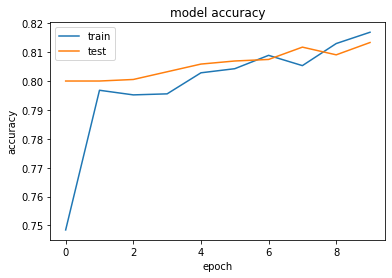

In [72]:
#summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'],loc='upper left')
plt.show()

# Making the predictions and evaluting the model


In [73]:
#predicting the test set results
y_pred = classifier.predict(X_test)
#here the y_pred value is less than 0.5 is 'False' and greater than 0.5 is 'True'
y_pred = (y_pred > 0.5)
print(y_pred)

[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]


In [74]:
#Making the confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, y_pred))


[[1981   10]
 [ 445   64]]


In [75]:
#calculating the Accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred, Y_test))

0.818
